In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import statistics as st
%matplotlib inline

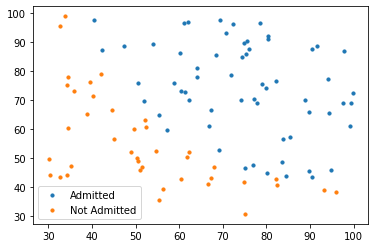

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# data = np.loadtxt('ex2data1.txt',delimiter=',')
data = load_data("ex2data1.txt", None)
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [3]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [4]:
def net_input(theta,x):
    return np.dot(x,theta)

In [5]:
def probability(theta,x):
    return sigmoid(net_input(theta,x))

In [6]:
def cost_function(x,y,theta):
    m=x.shape[0]
    a1=probability(theta, x)
    a2=1 - probability(theta, x)
    if a1.all() and a2.all():
        cost = -(1 / m) * np.sum(y*np.log(a1) + (1 - y)*np.log(a2))
    else:
        cost=0
    return cost

In [7]:
def logical_regression_gradient_descent(x,y,theta,learning_rate,iter):
    n=(x.shape[0])
    y=pd.DataFrame(data[2])
    cost_value = np.zeros(iter)
    theta_value = np.zeros((iter,3))
    for i in range(iter):
        h_x = probability(theta,x)
        theta = theta - (1/n)*learning_rate*np.dot(np.transpose(x),(h_x-y))
        theta_value[i] = np.transpose(theta)
        cost_value[i] = cost_function(x,y,theta)        
    return theta,cost_value,theta_value  

In [8]:
theta = np.random.randn(3,1)
x = np.c_[np.ones((len(X),1)),X]

learning_rate=0.003
iter=250000
# print(theta)
theta,cost_value,theta_value = logical_regression_gradient_descent(x,y,theta,learning_rate,iter)
print('Theta 0 = ',theta[0][0])
print('Theta 1 = ',theta[1][0])
print('Theta 2 = ',theta[2][0])
print('Final cost = ',cost_value[-1])


Theta 0 =  -18.149823221566766
Theta 1 =  0.15021939681069157
Theta 2 =  0.1447258833961174
Final cost =  0.21308426130066038


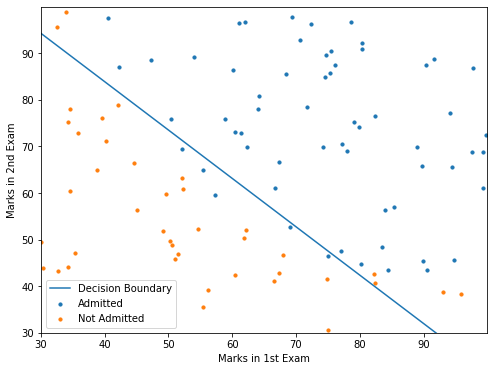

In [10]:
plt.figure(figsize=(8,6))
plt.xlim(30,100)
plt.ylim(30,100)
x_values = np.array([min(X[0])-2, max(X[0])+2])
y_values = - (theta[0][0] + np.dot(theta[1][0], x_values)) / theta[2][0]
plt.xticks(np.arange(30, 100, 10))
plt.yticks(np.arange(30, 100, 10))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()
